# Histograma e Estatística de uma imagem

## Histograma de uma imagem

A imagem normalmente é composta de um grande número de pixels; hoje em dia,
celulares tiram fotografias com a resolução espacial que produz alguns milhões de pixels.
Uma das caracterizações ou "assinaturas" mais eficientes da imagem é seu histograma.

Estude o pequeno tutorial disponível em:

- [Tutorial - Histograma e Estatísticas](../master/tutorial_hist__stat_2.ipynb)
 e após
isto, plote com ``adshow(iaplot())`` o histograma da imagem a seguir:

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
    import ia898.src as ia

In [17]:
!ls -l ../../ia898/data


total 932
-rw-rw-r-- 1 lotufo lotufo 194768 Mar 19 17:02 boat.tif
-rw-rw-r-- 1 lotufo lotufo  65734 Mar 19 17:02 cameraman.tif
-rw-rw-r-- 1 lotufo lotufo  65669 Mar 19 17:02 gull.pgm
-rw-rw-r-- 1 lotufo lotufo  94802 Mar 19 17:02 keyb.tif
-rw-rw-r-- 1 lotufo lotufo  65610 Mar 19 17:02 lenina.pgm
-rw-rw-r-- 1 lotufo lotufo  65734 Mar 19 17:02 retina.tif
-rw-rw-r-- 1 lotufo lotufo 307238 Mar 19 17:02 tvframe.pgm
-rw-rw-r-- 1 lotufo lotufo  66330 Mar 19 17:02 woodlog.tif


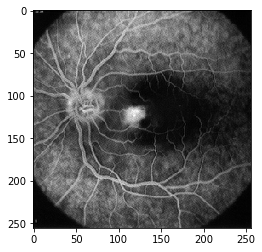

In [36]:
f = mpimg.imread('../data/retina.tif')
plt.imshow(f,cmap='gray');

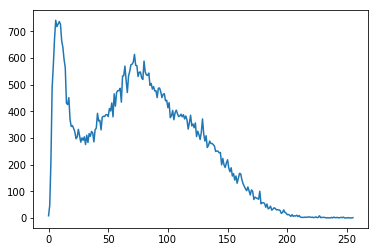

In [37]:
h = ia.histogram(f)
plt.plot(h);

## Uso do matplotlib

Veja aqui neste breve tutorial como utilizar o matplotlib:

- [tutorial_matplotlib](../master/tutorial_matplotlib.ipynb)


## Estatísticas de uma imagem

Estude a função `ia636:iah2stats` que calcula diversas estatísticas da imagem a partir de
seu histograma. Observe que estas estatísticas podem ser obtidas tanto diretamente da imagem como do histograma.

A grande vantagem de calcular a estatística a partir do histograma é que o histograma é tipicamente um vetor de
256 elementos enquanto que a imagem pode ser de milhões de pixels. Assim, quando se precisa calcular diversos
valores estatísticos de uma imagem, calcula-se seu histograma e posteriormente seus valores estatísticos, calculados
a partir do histogram.

Como ilustração, iremos medir o tempo para calcular a média (`np.mean`) e o valor mediano (`np.median`) fazendo o cálculo diretamente na imagem e comparar com o tempo de se calcular estas estatísticas a partir do histograma:

In [38]:
%%time
print('f.mean()=', f.mean())
print('np.median(f)=', np.median(f))

f.mean()= 76.7312927246
np.median(f)= 75.0
CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 2.68 ms


In [39]:
%%time
h = ia.histogram(f)
v = ia.h2stats(h)
print('média:',v[0])
print('mediano:',v[8])

média: 76.7312927246
mediano: 75.0
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.04 ms


Procure utilizar a função iah2stats operando no histograma para calcular estes mesmos valores.

# utilize ia.iah2stats para calcular média e mediana da imagem da retina.tif

mean = 76.7312927246
variance = 2170.06353859
skewness = 0.260918564832
kurtosis =  -0.647865714503
entropy =  5.13305171002
mode =  6.0
percentil 1% =  3.0
percentil 10% =  12.0
percentil 50% =  75.0
percentil 90% =  140.0
percentil 99% =  183.0


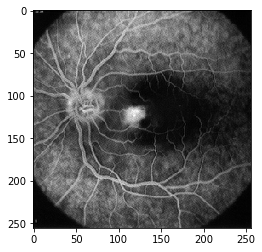

In [41]:
plt.imshow(f,cmap='gray')
h = ia.histogram(f)
v = ia.h2stats(h)
print('mean =',v[0])
print('variance =',v[1])
print('skewness =',v[2])
print('kurtosis = ',v[3])
print('entropy = ',v[4])
print('mode = ',v[5])
print('percentil 1% = ',v[6])
print('percentil 10% = ',v[7])
print('percentil 50% = ',v[8])
print('percentil 90% = ',v[9])
print('percentil 99% = ',v[10])

## Histograma de imagens aleatórias

Calcule e plote os histogramas das imagens f1, f2 e f3 a seguir, dando uma justificativa para cada caso em relação ao formato do histograma.
Aproveite para estudar as funções de geração de dados aleatórios "randint", "shuffle" e "random.normal":

In [ ]:
f1 = np.random.randint(0,256, (128,256)).astype(np.uint8)
plt.imshow( f1, 'f1')
h1 = ia.histogram(f1)
plt.bar( np.arange(h1.size), h1)
plt.imshow( ia.iafig2img(fig2), 'histograma de f1')

In [ ]:
f_2 = np.resize(np.arange(256, dtype=np.uint8), (128,256)) # imagem rampa
f2 = np.ravel(f_2)
np.random.shuffle(f2)
adshow(f2.reshape(f_2.shape), 'f2')
h2 = ia.iahistogram(f2)
fig3 = plt.figure()
plt.bar( np.arange(h2.size), h2)
adshow( ia.iafig2img(fig3), 'histograma de f2')

In [ ]:
f_3 = np.random.randn(128,256)
f3 = ia.ianormalize(f_3).astype(np.uint8)
adshow(f3, 'f3')
h3 = ia.iahistogram(f3)
fig4 = plt.figure()
plt.bar( np.arange(h3.size), h3)
adshow( ia.iafig2img(fig4), 'histograma de f3')

## Teste de autoavaliação

Faça o teste múltipla escolha a seguir para verificar os conhecimentos adquiridos com esta atividade.
O teste é para autoestudo e pode ser repetido várias vezes:

- `http://adessowiki.fee.unicamp.br/adesso-1/q/ae2-3/ Teste de autoestudo - Histograma e estatísticas de uma imagem`

## Referências
===========

- `http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html NumPy Reference: mean`
- `http://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html NumPy Reference: median`
- `http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html NumPy Reference: random.randint`
- `http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html NumPy Reference: random.shuffle`
- `http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html NumPy Reference: random.normal`

## Referências n Toolbox

- [histogram](../../ia898/src/histogram.ipynb) - calcula o histograma de uma imagem
- [h2stats](../../ia898/src/h2stats.ipynb) - calcula valores estatísticos de uma imagem a partir de seu histograma
